<a href="https://colab.research.google.com/github/jburchfield76/datasharing/blob/master/Binary_Predict_Accuracy_DASC_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [3]:
raw_data = pd.read_csv('Bank_data.csv')
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0,1,0,0,117,no
1,1,0.767,0,0,2,1,274,yes
2,2,4.858,0,1,0,0,167,no
3,3,4.120,0,0,0,0,686,yes
4,4,4.856,0,1,0,0,157,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0,1,0,0,204,no
514,514,0.861,0,0,2,1,806,yes
515,515,0.879,0,0,0,0,290,no
516,516,0.877,0,0,5,1,473,yes


In [4]:
# We make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.
data = raw_data.copy()
# Removes the index column thata comes with the data
data = data.drop(['Unnamed: 0'], axis = 1)
# We use the map function to change any 'yes' values to 1 and 'no'values to 0.
data['y'] = data['y'].map({'yes':1, 'no':0})
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0,1,0,0,117,0
1,0.767,0,0,2,1,274,1
2,4.858,0,1,0,0,167,0
3,4.120,0,0,0,0,686,1
4,4.856,0,1,0,0,157,0
...,...,...,...,...,...,...,...
513,1.334,0,1,0,0,204,0
514,0.861,0,0,2,1,806,1
515,0.879,0,0,0,0,290,0
516,0.877,0,0,5,1,473,1


In [5]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


In [6]:
y = data['y']
x1 = data['duration']

In [7]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Jun 2025   Pseudo R-squ.:                  0.2121
Time:                        19:22:08   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

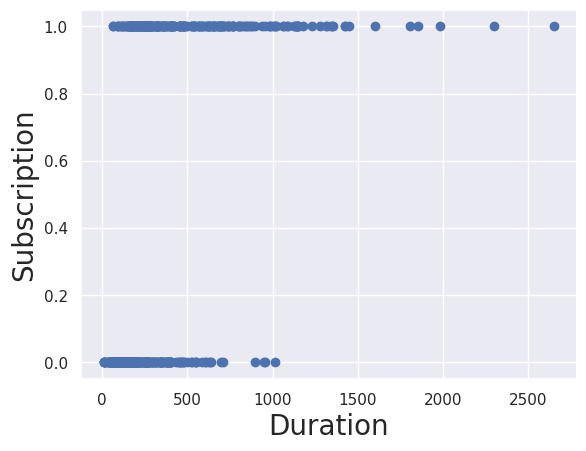

In [8]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color = 'C0')
# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

In [9]:
# To avoid writing them out every time, we save the names of the estimators of our model in a list.
estimators=['interest_rate','march','credit','previous','duration']

X1 = data[estimators]   #multiple logistic regression now
y = data['y']

In [10]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.514     
Date:               2025-06-19 19:24 AIC:              360.7836  
No. Observations:   518              BIC:              386.2834  
Df Model:           5                Log-Likelihood:   -174.39   
Df Residuals:       512              LL-Null:          -359.05   
Converged:          1.0000           LLR p-value:      1.2114e-77
No. Iterations:     7.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0211   0.3113 -0.0677 0.9460 -0.6313  0.5891
interest_rate     -0.8001   0.0895 -8.9434 0.0000 -0.9755 -0.6248
march             -1.8322   0.3297 -5.5563 0.0000 -2.4785 -1.1859
credit             2.3585   1.0875  2.1688 0.0301  0.2271  4.4900
previous           1.5363   0.5010  3.0666 0.0022  0.5544  2.5182
duration           0.0070   0.0007  9.3810 0.0000  0.0055  0.0084
=================================================================

"""

In [11]:
def confusion_matrix(data,actual_values,model):

        # Confusion matrix

        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s

        # model: a LogitResults object
            # this is the variable where you have the fitted model
            # e.g. results_log in this course
        # ----------

        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 they will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and
        return cm, accuracy

In [12]:
confusion_matrix(X,y,results_logit)

(array([[218.,  41.],
        [ 30., 229.]]),
 np.float64(0.862934362934363))